# Destin AI, Machine Learning Assignment 2


## Problem statement

One of the goals of our company among others is to provide users with answers to their questions. Since we are a legal startup, specially focused on immigration and visa, we are interested in helping people with their visa related questions. There are tons of sources on internet like cic, canadavisa and etc. where you can find answers to these kind of questions. But wouldn't it be great if you could just ask them in one unified platform by just chatting with an agent who is not only able to answer your questions, but also can make suggestions based on them, point you in the right direction and connect you with people like lawyers who can help you in your journey to a new country? So, that is why we are building this AI chatbot solution trained with an immigration/visa domain that can offer answers to people's questions and guide them in the right path to a destination. 


## Approach

In order to build this chatbot solution, we are leveraging already existing tools and technologies such as messenger platforms and AI agents such as Dialogflow. These agents are able to handle basic conversations and certain domains. We need to extend this domain to immigration/visa and this means we have to be able to match user question with an answer. In other words, we have to train a model which can recognize similar sentences. So, it is a Natural Language Understanding problem and we need to encode and decode sentences in some fashion to find semantically related sentences. One approach to doing this is to map sentences that share semantic and syntactic properties to similar vector representations. There is a model called Skip Thoughts (by Ryan Kiros, Yukun Zhu, Ruslan Salakhutdinov, Richard S. Zemel, Antonio Torralba, Raquel Urtasun, Sanja Fidler) which is distributed sentence encoder based on this approach. This model has been trained with a vast amount of text from wiki pages, but it also provides a mechanism for a simple vocabulary expansion which is what we need to extend our domain with visa related concepts and this is done by encoding words into vectors which is called word2vec (by Mikolov et al.)

Word2vec is computationally-efficient predictive model for learning word embeddings from raw text. It uses either of 2 approaches - Continuous Bag-of-Words model (CBOW) and the Skip-Gram model. Algorithmically, these models are similar, except that CBOW predicts target words from source context words, while the skip-gram does the inverse and predicts source context-words from the target words. Word2Vec is trained using 3 layer neural network (1 input, 1 hidden, 1 output) and actually hidden layer produces the word embeddings so we discard the ouput layer. Here in this assignment, I would like prototype this model by training it on sentences collected from https://www.canadavisa.com/canada-immigration-questions-faq.html.  

In [1]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [13]:
data = pd.read_csv('faq.csv')

In [ ]:
data.head()

In [14]:
questions = data['question'].tolist()
answers = data['answer'].tolist()

In [15]:
#pre processing the text 
import re
def normalize_text(text):

    text = text.lower()
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+)|(pic\.twitter\.com/[^\s]+))','', text)
    text = re.sub('@[^\s]+','', text)
    text = re.sub('#([^\s]+)', '', text)
    text = re.sub('[:;>?<=*+()&,\-#!$%\{˜|\}\[^_\\@\]1234567890’‘]',' ', text)
    text = re.sub('[\d]','', text)
    text = text.replace(".", '')
    text = text.replace("'", '')
    text = text.replace("`", '')
    text = text.replace("'s", '')
    text = text.replace("/", ' ')
    text = text.replace("\"", ' ')
    text = text.replace("\\", '')
    re.sub(' +', ' ', text)
    text = text.replace('\n', ' ').replace('\r', ' ').replace('\t', ' ')
    #normalize some utf8 encoding
    text = text.replace("\x9d",'').replace("\x8c",'')
    text = text.replace("\xa0",'')
    text = text.replace("\x9d\x92", '').replace("\x9a\xaa\xf0\x9f\x94\xb5", '').replace("\xf0\x9f\x91\x8d\x87\xba\xf0\x9f\x87\xb8", '').replace("\x9f",'').replace("\x91\x8d",'')
    text = text.replace("\xf0\x9f\x87\xba\xf0\x9f\x87\xb8",'').replace("\xf0",'').replace('\xf0x9f','').replace("\x9f\x91\x8d",'').replace("\x87\xba\x87\xb8",'')
    text = text.replace("\xe2\x80\x94",'').replace("\x9d\xa4",'').replace("\x96\x91",'').replace("\xe1\x91\xac\xc9\x8c\xce\x90\xc8\xbb\xef\xbb\x89\xd4\xbc\xef\xbb\x89\xc5\xa0\xc5\xa0\xc2\xb8",'')
    text = text.replace("\xe2\x80\x99s", "").replace("\xe2\x80\x98", '').replace("\xe2\x80\x99", '').replace("\xe2\x80\x9c", "").replace("\xe2\x80\x9d", "")
    text = text.replace("\xe2\x82\xac", "").replace("\xc2\xa3", "").replace("\xc2\xa0", "").replace("\xc2\xab", "").replace("\xf0\x9f\x94\xb4", "").replace("\xf0\x9f\x87\xba\xf0\x9f\x87\xb8\xf0\x9f", "")
    text =  re.sub(r"\b[a-z]\b", "", text)
    text = re.sub( '\s+', ' ', text).strip()
    
    text = re.sub(r'\.+', ".", text)
    text = re.sub(r'\.\.+', ' ', text).replace('.', '')
    # Replace multiple dots with space
    text = re.sub('\.\.+', ' ', text) 
    # Remove single dots
    text = re.sub('\.', '', text)
    text = re.sub(r'\.{2,}', ' ', text)
    text = re.sub(r'\.{1}', '', text)
    
    return text

In [16]:
sentences = []
for question in questions:
    sentence = normalize_text(question)
    sentences.append(sentence)
    
for answer in answers:
    sentence = normalize_text(answer)
    sentences.append(sentence)

In [20]:
print(sentences)

['what information is available under the access to information act and privacy act', 'who can make request under the access to information act', 'who can make request under the privacy act', 'will my access to information or privacy request be processed faster if my representative sends it', 'what is the fee for an access request', 'what is the fee for privacy request', 'how and where do submit an access to information or privacy request', 'how long does the department have to respond', 'can get personal information about someone else', 'can get personal information about someone who is deceased', 'how can get information on an individual who arrived in canada before', 'what information should provide to get naturalization record', 'can non residents of canada who are conducting genealogical research access family records held by canadian federal institutions', 'sponsored family member who resides outside of canada and he she applied for permanent residence at visa office overseas can

In [18]:
f = open('faq.txt')
content = normalize_text(f.read())
print(content)

frequently asked questions about the express entry immigration selection system what is express entry click to collapse express entryis an electronic management application system for immigration to canada it is not an immigration program rather it facilitates the selection and processing of canada economic immigration programs the federal skilled worker class formerly the federal skilled worker program the federal skilled trades class formerly the federal skilled trades program the canadian experience class and portion of the provincial nominee programs applicants make an expression of interest eoi in immigrating to canada and if they are eligible for at least one of the aforementioned programs they then enter the express entry pool the federal government and provincial governments as well as canadian employers are then able to select candidates from this pool who will then receive an invitation to apply ita for immigration tocanada under one of the programs express entry moves canada

In [21]:
import collections
# sentences to words and count

words = " ".join(sentences).split() 
words.extend(content.split()) 
count = collections.Counter(words).most_common() 
print ("Word count", count[:5])

Word count [('the', 18656), ('to', 16153), ('you', 12904), ('your', 9418), ('of', 7861)]


In [22]:
# Build dictionaries
unique_words =  [i[0] for i in count]
dic = {w: i for i, w in enumerate(unique_words)}
voc_size = len(dic)

In [23]:
voc_size

8672

In [24]:
# Make indexed word data
data = [dic[word] for word in words] #count rank for every word in words
print('Sample data', data[:10], words[:10])

Sample data [47, 38, 13, 367, 52, 0, 207, 1, 38, 786] ['what', 'information', 'is', 'available', 'under', 'the', 'access', 'to', 'information', 'act']


In [25]:
# Let's make a training data for window size 1 for simplicity

cbow_pairs = []
for i in range(1, len(data)-1) :
    cbow_pairs.append([[data[i-1], data[i+1]], data[i]]);
    
print('Context pairs rank ids', cbow_pairs[:5])
print()

cbow_pairs_words = []
for i in range(1, len(words)-1) :
    cbow_pairs_words.append([[words[i-1], words[i+1]], words[i]]);
print('Context pairs words', cbow_pairs_words[:5])

Context pairs rank ids [[[47, 13], 38], [[38, 367], 13], [[13, 52], 367], [[367, 0], 52], [[52, 207], 0]]

Context pairs words [[['what', 'is'], 'information'], [['information', 'available'], 'is'], [['is', 'under'], 'available'], [['available', 'the'], 'under'], [['under', 'access'], 'the']]


In [26]:
# Let's make skip-gram pairs
# (quick, the), (quick, brown), (brown, quick), (brown, fox), ...
skip_gram_pairs=[]

for c in cbow_pairs:
    skip_gram_pairs.append([c[1],c[0][0]])
    skip_gram_pairs.append([c[1],c[0][1]])
print('skip-gram pairs', skip_gram_pairs[:5])
print()
skip_gram_pairs_words=[]
for c in cbow_pairs_words:
    skip_gram_pairs_words.append([c[1],c[0][0]])
    skip_gram_pairs_words.append([c[1],c[0][1]])
print('skip-gram pairs words', skip_gram_pairs_words[:5])

skip-gram pairs [[38, 47], [38, 13], [13, 38], [13, 367], [367, 13]]

skip-gram pairs words [['information', 'what'], ['information', 'is'], ['is', 'information'], ['is', 'available'], ['available', 'is']]


In [27]:
def get_batch(size):
    assert size<len(skip_gram_pairs)
    X=[]
    Y=[]
    rdm = np.random.choice(range(len(skip_gram_pairs)),size,replace=False)
    
    for r in rdm:
        X.append(skip_gram_pairs[r][0])
        Y.append([skip_gram_pairs[r][1]])
    return X , Y

# generate_batch test
print ('Batches (x, y)', get_batch(3))

Batches (x, y) ([1, 161, 116], [[211], [38], [598]])


In [28]:
#tensor flow code
import tensorflow as tf

batch_size = 20
embedding_size = 2
num_sampled = 15    # Number of negative examples to sample.

X= tf.placeholder(tf.int32,shape=[batch_size]) #inputs
Y= tf.placeholder(tf.int32,shape=[batch_size,1]) #labels

with tf.device("/cpu:0"):
      # Look up embeddings for inputs.
    embeddings = tf.Variable(tf.random_uniform([voc_size,embedding_size],-1.0,1.0))
    embed = tf.nn.embedding_lookup(embeddings, X) # lookup table
    
# Construct the variables for the NCE loss
nce_weights = tf.Variable(tf.random_uniform([voc_size, embedding_size],-1.0, 1.0))
nce_biases = tf.Variable(tf.zeros([voc_size]))

# Compute the average NCE loss for the batch.
# This does the magic:
#   tf.nn.nce_loss(weights, biases, inputs, labels, num_sampled, num_classes ...)
# It automatically draws negative samples when we evaluate the loss.
loss = tf.reduce_mean(tf.nn.nce_loss(nce_weights, nce_biases, Y, embed, num_sampled, voc_size))
# Use the adam optimizer
optimizer = tf.train.AdamOptimizer(1e-1).minimize(loss)

Loss at  0 78.813156
Loss at  1000 43.61693
Loss at  2000 28.627087
Loss at  3000 38.048134
Loss at  4000 11.920866
Loss at  5000 14.044835


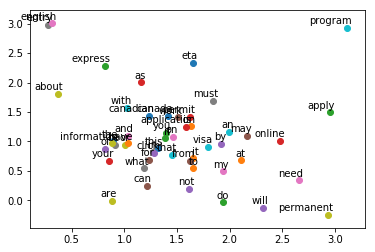

In [29]:
epochs=6000
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for epoch in range(epochs):
        
        batch_inputs, batch_labels = get_batch(batch_size)
        _,loss_val=sess.run([optimizer,loss],feed_dict = {X : batch_inputs, Y : batch_labels })
        
        if epoch % 1000 == 0:
            print("Loss at ", epoch, loss_val) # Report the loss
    
    # Final embeddings are ready for you to use. Need to normalize for practical use
    trained_embeddings = embeddings.eval()
    

import matplotlib.pyplot as plt
# Show word2vec if dim is 2
if trained_embeddings.shape[1] == 2:
    labels = unique_words[:50] # Show top 10 words
    for i, label in enumerate(labels):
        x, y = trained_embeddings[i,:]
        plt.scatter(x, y)
        plt.annotate(label, xy=(x, y), xytext=(5, 2),
            textcoords='offset points', ha='right', va='bottom')
    #plt.savefig("word2vec.png")
    plt.show()